In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
pd.set_option("display.max_columns", None)

# Sourcing the Zillow database as the data source, create a jupyter notebook named explore_zillow and do the following:

### 1.Ask at least 5 questions about the data, keeping in mind that your target variable is logerror. e.g. Is logerror significantly different for properties in LA County vs Orange County vs Ventura County?

### 2.Answer those questions through a mix of statistical tests and visualizations.

In [3]:
df= pd.read_csv('zillow.csv')
df.head()

,Unnamed: 0,id,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate,propertylandusedesc
0,0,1727539,14297519,3.5,4.0,3.5,3100.0,3100.0,6059.0,3.0,33634931.0,-117869207.0,4506.0,122,261.0,6.059063e+07,53571.0,1286.0,96978.0,0.0,1998.0,485713.0,1023282.0,2016.0,537569.0,11013.72,6.059063e+13,0.025595,2017-01-01,Single Family Residential
1,1,1387261,17052889,1.0,2.0,1.0,1465.0,1465.0,6111.0,1.0,34449266.0,-119281531.0,12647.0,1110,261.0,6.111001e+07,13091.0,2061.0,97099.0,5.0,1967.0,88000.0,464000.0,2016.0,376000.0,5672.48,6.111001e+13,0.055619,2017-01-01,Single Family Residential
2,2,11677,14186244,2.0,3.0,2.0,1243.0,1243.0,6059.0,2.0,33886168.0,-117823170.0,8432.0,122,261.0,6.059022e+07,21412.0,1286.0,97078.0,6.0,1962.0,85289.0,564778.0,2016.0,479489.0,6488.30,6.059022e+13,0.005383,2017-01-01,Single Family Residential
3,3,2288172,12177905,3.0,4.0,3.0,2376.0,2376.0,6037.0,3.0,34245180.0,-118240722.0,13038.0,0101,261.0,6.037300e+07,396551.0,3101.0,96330.0,0.0,1970.0,108918.0,145143.0,2016.0,36225.0,1777.51,6.037300e+13,-0.103410,2017-01-01,Single Family Residential
4,4,781532,12095076,3.0,4.0,3.0,2962.0,2962.0,6037.0,3.0,34145202.0,-118179824.0,63000.0,0101,261.0,6.037461e+07,47019.0,3101.0,96293.0,0.0,1950.0,276684.0,773303.0,2016.0,496619.0,9516.26,6.037461e+13,-0.001011,2017-01-01,Single Family Residential


In [4]:
df=df.drop(columns=['Unnamed: 0','propertylandusedesc'])
df.head()

,id,parcelid,bathroomcnt,bedroomcnt,calculatedbathnbr,calculatedfinishedsquarefeet,finishedsquarefeet12,fips,fullbathcnt,latitude,longitude,lotsizesquarefeet,propertycountylandusecode,propertylandusetypeid,rawcensustractandblock,regionidcity,regionidcounty,regionidzip,roomcnt,yearbuilt,structuretaxvaluedollarcnt,taxvaluedollarcnt,assessmentyear,landtaxvaluedollarcnt,taxamount,censustractandblock,logerror,transactiondate
0,1727539,14297519,3.5,4.0,3.5,3100.0,3100.0,6059.0,3.0,33634931.0,-117869207.0,4506.0,122,261.0,6.059063e+07,53571.0,1286.0,96978.0,0.0,1998.0,485713.0,1023282.0,2016.0,537569.0,11013.72,6.059063e+13,0.025595,2017-01-01
1,1387261,17052889,1.0,2.0,1.0,1465.0,1465.0,6111.0,1.0,34449266.0,-119281531.0,12647.0,1110,261.0,6.111001e+07,13091.0,2061.0,97099.0,5.0,1967.0,88000.0,464000.0,2016.0,376000.0,5672.48,6.111001e+13,0.055619,2017-01-01
2,11677,14186244,2.0,3.0,2.0,1243.0,1243.0,6059.0,2.0,33886168.0,-117823170.0,8432.0,122,261.0,6.059022e+07,21412.0,1286.0,97078.0,6.0,1962.0,85289.0,564778.0,2016.0,479489.0,6488.30,6.059022e+13,0.005383,2017-01-01
3,2288172,12177905,3.0,4.0,3.0,2376.0,2376.0,6037.0,3.0,34245180.0,-118240722.0,13038.0,0101,261.0,6.037300e+07,396551.0,3101.0,96330.0,0.0,1970.0,108918.0,145143.0,2016.0,36225.0,1777.51,6.037300e+13,-0.103410,2017-01-01
4,781532,12095076,3.0,4.0,3.0,2962.0,2962.0,6037.0,3.0,34145202.0,-118179824.0,63000.0,0101,261.0,6.037461e+07,47019.0,3101.0,96293.0,0.0,1950.0,276684.0,773303.0,2016.0,496619.0,9516.26,6.037461e+13,-0.001011,2017-01-01


In [5]:
df.isna().sum()


id                                 0
parcelid                           0
bathroomcnt                        0
bedroomcnt                         0
calculatedbathnbr                127
calculatedfinishedsquarefeet      73
finishedsquarefeet12             238
fips                               0
fullbathcnt                      127
latitude                           0
longitude                          0
lotsizesquarefeet                360
propertycountylandusecode          0
propertylandusetypeid              0
rawcensustractandblock             0
regionidcity                    1032
regionidcounty                     0
regionidzip                       23
roomcnt                            0
yearbuilt                        106
structuretaxvaluedollarcnt        79
taxvaluedollarcnt                  1
assessmentyear                     0
landtaxvaluedollarcnt              1
taxamount                          4
censustractandblock              113
logerror                           0
t

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52312 entries, 0 to 52311
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   id                            52312 non-null  int64  
 1   parcelid                      52312 non-null  int64  
 2   bathroomcnt                   52312 non-null  float64
 3   bedroomcnt                    52312 non-null  float64
 4   calculatedbathnbr             52185 non-null  float64
 5   calculatedfinishedsquarefeet  52239 non-null  float64
 6   finishedsquarefeet12          52074 non-null  float64
 7   fips                          52312 non-null  float64
 8   fullbathcnt                   52185 non-null  float64
 9   latitude                      52312 non-null  float64
 10  longitude                     52312 non-null  float64
 11  lotsizesquarefeet             51952 non-null  float64
 12  propertycountylandusecode     52312 non-null  object 
 13  p

# Univariate analysis

<AxesSubplot:xlabel='fips', ylabel='logerror'>

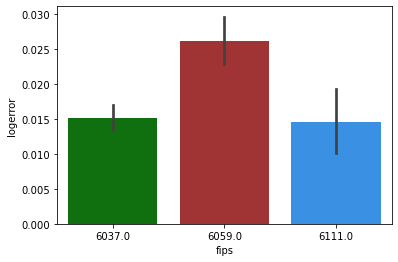

In [8]:

# target variable is logerror
sns.barplot(x=df.fips,y=df.logerror,palette=['green','firebrick','dodgerblue'])


<AxesSubplot:xlabel='taxvaluedollarcnt', ylabel='logerror'>

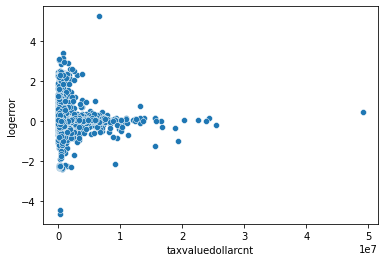

In [10]:
sns.scatterplot( data= df,x='taxvaluedollarcnt',y='logerror')

Text(0.5, 1.0, 'Home value greater than 1.25 Million $')

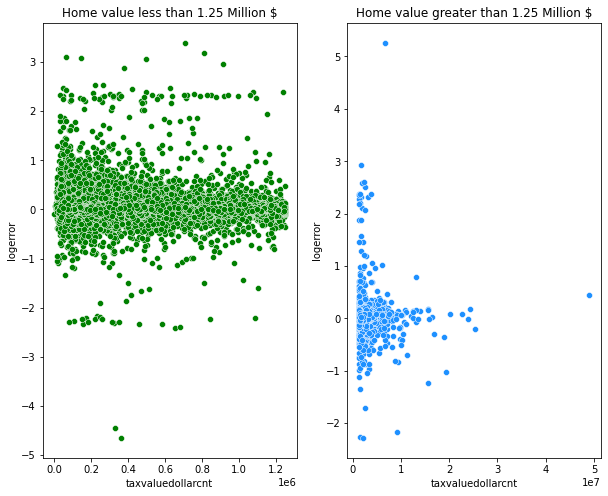

In [13]:
plt.figure(figsize=(10,8))
plt.subplot(121)
sns.scatterplot(data= df[df.taxvaluedollarcnt< 1_250_000],x='taxvaluedollarcnt',y='logerror', color='green')
plt.title('Home value less than 1.25 Million $')
plt.subplot(122)
sns.scatterplot(data= df[df.taxvaluedollarcnt>= 1_250_000],x='taxvaluedollarcnt',y='logerror', color='dodgerblue')
plt.title('Home value greater than 1.25 Million $')



<Figure size 576x576 with 0 Axes>

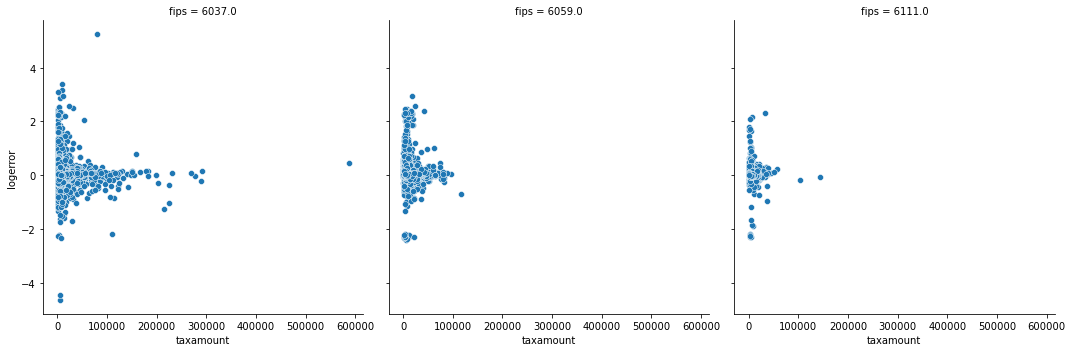

In [62]:
plt.figure(figsize=(8,8))
sns.relplot(y='logerror',x= 'taxamount', col='fips',data= df)

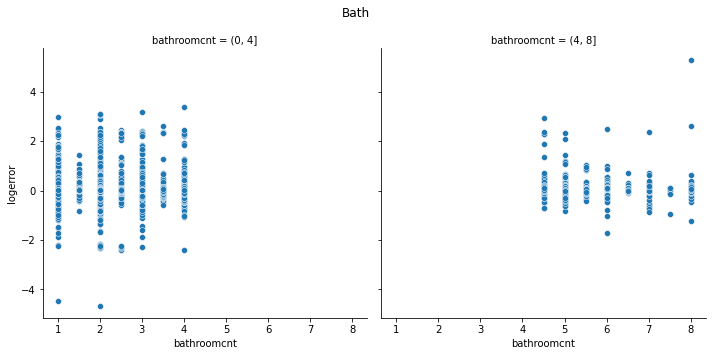

In [59]:
sns.relplot(data=df,
           x='yearbuilt',
           y='logerror',
           col= pd.cut(df.yearbuiltt, bins=[0,4,8]))
plt.suptitle('Bath')
plt.tight_layout()

In [7]:
df.yearbuilt.max(), df.yearbuilt.min()

(2016.0, 1878.0)

In [63]:
fips_means = df.groupby('fips', as_index=False)['logerror'].mean()
fips_means

,fips,logerror
0,6037.0,0.015181
1,6059.0,0.026149
2,6111.0,0.014594


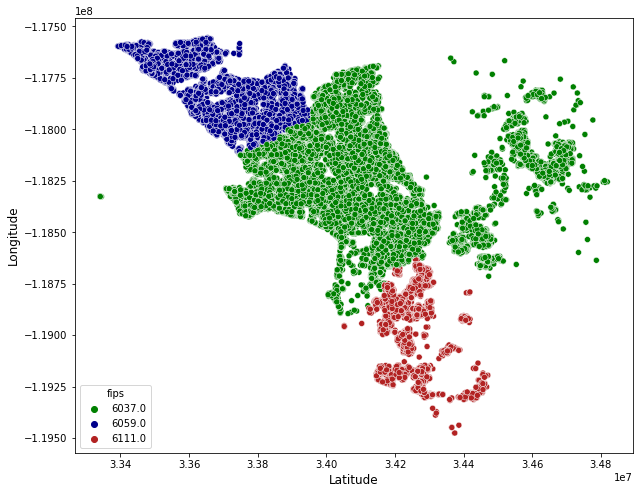

In [24]:
plt.figure(figsize=(10,8))
sns.scatterplot(x=df.latitude, y=df.longitude,hue=df['fips'],palette=['green','darkblue','firebrick'])
plt.ylabel('Longitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()


In [ ]:
sns.relplot()

In [8]:
df.columns.tolist()

['id',
 'parcelid',
 'bathroomcnt',
 'bedroomcnt',
 'calculatedbathnbr',
 'calculatedfinishedsquarefeet',
 'finishedsquarefeet12',
 'fips',
 'fullbathcnt',
 'latitude',
 'longitude',
 'lotsizesquarefeet',
 'propertycountylandusecode',
 'propertylandusetypeid',
 'rawcensustractandblock',
 'regionidcity',
 'regionidcounty',
 'regionidzip',
 'roomcnt',
 'yearbuilt',
 'structuretaxvaluedollarcnt',
 'taxvaluedollarcnt',
 'assessmentyear',
 'landtaxvaluedollarcnt',
 'taxamount',
 'censustractandblock',
 'logerror',
 'transactiondate',
 'propertylandusedesc']

In [29]:
df.bedroomcnt.value_counts()

3.0     23303
4.0     15210
2.0      8317
5.0      3967
6.0       634
1.0       611
0.0       127
7.0       106
8.0        24
9.0         8
10.0        2
14.0        1
11.0        1
12.0        1
Name: bedroomcnt, dtype: int64